# Importing Important Libraries for the MLP Model Creation




In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##Load Tips Dataset from Seaborn

In [8]:
tips = sns.load_dataset('tips')
print(tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Converting categorical variables to numerical values using one-hot encoding

In [9]:
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

## Separating features and target variable:

In [10]:
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

## Splitting the dataset into training and testing sets:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing the features:

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Displaying Shapes

In [13]:
print("\nShapes of the datasets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Shapes of the datasets:
X_train shape: (195, 8)
X_test shape: (49, 8)
y_train shape: (195,)
y_test shape: (49,)


## Building the Neural Network Model:

In [14]:
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer with 32 neurons
model.add(Dense(16, activation='relu'))  # Second hidden layer with 16 neurons
model.add(Dense(1, activation='linear'))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the Model:

In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## Training the Model:

In [16]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 14.9357 - mae: 3.6350 - val_loss: 11.4838 - val_mae: 3.1035
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.0778 - mae: 3.3632 - val_loss: 10.6685 - val_mae: 2.9704
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.4661 - mae: 3.2646 - val_loss: 9.9495 - val_mae: 2.8460
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.0562 - mae: 3.0315 - val_loss: 9.3147 - val_mae: 2.7303
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.3812 - mae: 2.9270 - val_loss: 8.7482 - val_mae: 2.6228
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.6675 - mae: 2.8959 - val_loss: 8.2340 - val_mae: 2.5204
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7186 - mae: 2.7989 - val_loss: 7.7427 - val_mae: 2.4177
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1513 - mae: 2.6364 - val_loss: 7.2619 - val_mae: 2.3125
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7190 - mae: 

## Evaluating the Model:

In [17]:
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nMean Absolute Error on the test set: {mae}")


Mean Absolute Error on the test set: 0.8497744798660278


## Plotting Training History:

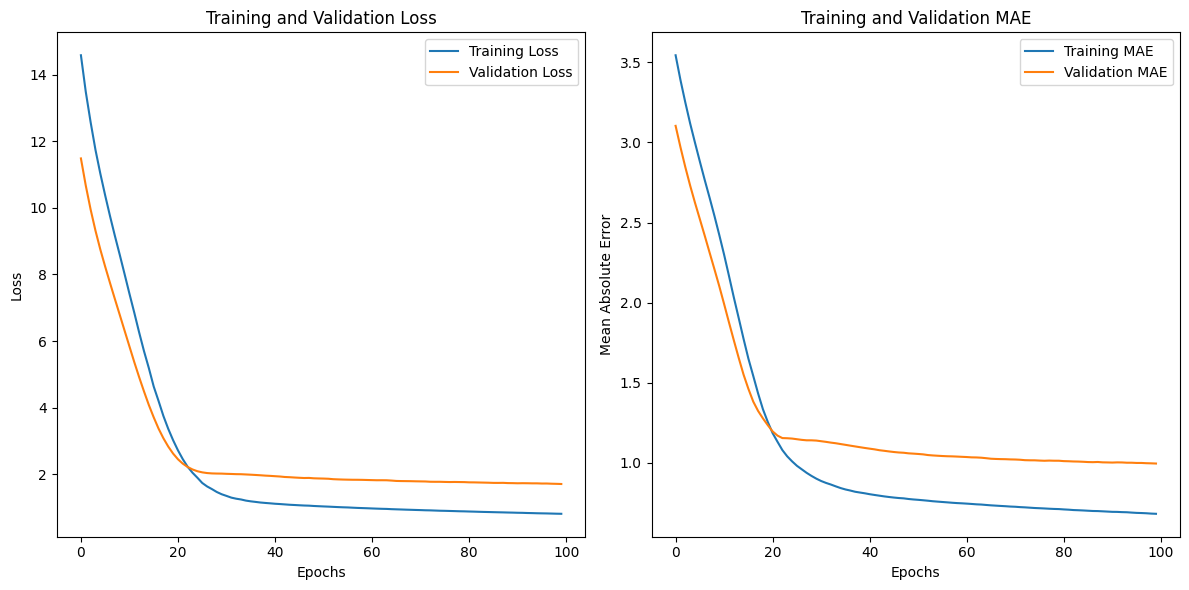

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()
